In [1]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import re
import  pandas as pd
import numpy as np

In [2]:
url = 'https://www.worldometers.info/coronavirus/coronavirus-age-sex-demographics/'

response = requests.get(url)

In [3]:

coverpage = response.content
soup1 = BeautifulSoup(coverpage, 'html5lib')

In [4]:
heading=soup1.find_all('table',class_="table table-hover table-bordered table-condensed table-list")


In [6]:
name=heading[0]

In [7]:
name

<table class="table table-hover table-bordered table-condensed table-list">
<tbody>
<tr bgcolor="#FCF8F8" class="scrollable bordered">
<td height="33"><div align="left">AGE</div></td>
<td>DEATH RATE<br/>
confirmed cases <br/></td>
<td>DEATH RATE<br/>
all cases</td>
</tr>
<tr class="scrollable bordered">
<td width="244"><div align="left"><strong>80+ years old </strong></div></td>
<td width="125"><div align="right"><strong>21.9%</strong></div></td>
<td width="125"><div align="right"><strong>14.8%</strong></div></td>
</tr>
<tr class="scrollable bordered">
<td><div align="left"><strong>70-79 years old </strong></div></td>
<td><div align="right"></div></td>
<td><div align="right"><strong>8.0%</strong></div></td>
</tr>
<tr class="scrollable bordered">
<td><div align="left"><strong>60-69 years old </strong></div></td>
<td><div align="right"></div></td>
<td><div align="right"><strong>3.6%</strong></div></td>
</tr>
<tr class="scrollable bordered">
<td><div align="left"><strong>50-59 years old <

In [8]:
import re

header=[]
values=[]
for trs in name.find_all('tr'):
        heading1=trs.get_text(strip=True)
        word1 = " ".join(re.findall("[a-zA-Z]+",heading1 ))
        tds = trs.find_all('td')
        row = [elem.text.strip(u'\u200b') for elem in tds]
        header.append(word1)
        values.append(row)
        

        

In [17]:
values

[['AGE', 'DEATH RATE\nconfirmed cases ', 'DEATH RATE\nall cases'],
 ['80+ years old ', '21.9%', '14.8%'],
 ['70-79 years old ', '', '8.0%'],
 ['60-69 years old ', '', '3.6%'],
 ['50-59 years old ', '', '1.3%'],
 ['40-49 years old ', '', '0.4%'],
 ['30-39 years old ', '', '0.2%'],
 ['20-29 years old ', '', '0.2%'],
 ['10-19 years old ', '', '0.2%'],
 ['0-9 years old ', '', 'no fatalities ']]

In [18]:
Age=[]
for x in values:
    Age.append(x[0])



In [20]:
Death_Rate=[]
for x in values:
    Death_Rate.append(x[2])

In [24]:
Death_Rate=Death_Rate[1:]

In [22]:
Age=Age[1:]

In [31]:
Age1=[]
for y in Age:
    z=y.replace('years old','')
    Age1.append(z)

In [37]:
import pandas as pd
AgeDistribution = {'Age':Age1,
        'Death Rate': Death_Rate
        }


In [38]:
df = pd.DataFrame(AgeDistribution, columns = ['Age', 'Death Rate'])
df.to_csv("C:/Users/smohammed/Desktop/Tableau/corona virus/daa hack/Agefatalities.csv",index= False)

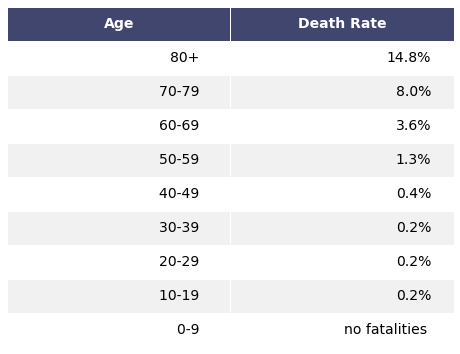

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

a=render_mpl_table(df, header_columns=0, col_width=4.0)
fig=a.get_figure()
fig.savefig("C:/Users/smohammed/Desktop/Tableau/corona virus/daa hack/startbootstrap-one-page-wonder-gh-pages/AgeFatalities.png")

In [41]:
name2=heading[1]

In [42]:
name2

<table class="table table-hover table-bordered table-condensed table-list">
<tbody>
<tr bgcolor="#FCF8F8" class="scrollable bordered">
<td height="33"><div align="left">SEX</div></td>
<td>DEATH RATE<br/>
confirmed cases <br/></td>
<td>DEATH RATE<br/>
all cases</td>
</tr>
<tr class="scrollable bordered">
<td width="209"><div align="left"><strong>Male</strong></div></td>
<td width="151"><div align="right"><strong>4.7%</strong></div></td>
<td width="142"><div align="right"><strong>2.8%</strong></div></td>
</tr>
<tr class="scrollable bordered">
<td><div align="left"><strong>Female</strong></div></td>
<td><div align="right"><strong>2.8%</strong></div></td>
<td><div align="right"><strong>1.7%</strong></div></td>
</tr>
</tbody>
</table>

In [43]:
name3=heading[2]

In [44]:
name3

<table class="table table-hover table-bordered table-condensed table-list">
<tbody>
<tr bgcolor="#FCF8F8" class="scrollable bordered">
<td height="33"><div align="left">PRE-EXISTING CONDITION</div></td>
<td>DEATH RATE<br/>
confirmed cases <br/></td>
<td>DEATH RATE<br/>
all cases</td>
</tr>
<tr class="scrollable bordered">
<td width="252"><div align="left"><strong><span class="story-body__list-item">Cardiovascular disease</span></strong></div></td>
<td width="141"><div align="right"><strong>13.2%</strong></div></td>
<td width="122"><div align="right"><strong>10.5%</strong></div></td>
</tr>
<tr class="scrollable bordered">
<td><div align="left"><strong><span class="story-body__list-item">Diabetes</span></strong></div></td>
<td><div align="right"><strong>9.2%</strong></div></td>
<td><div align="right"><strong>7.3%</strong></div></td>
</tr>
<tr class="scrollable bordered">
<td><div align="left"><span class="story-body__list-item"><strong>Chronic respiratory disease</strong></span></div></t

In [45]:
import re

header2=[]
values2=[]
for trs in name3.find_all('tr'):
        heading1=trs.get_text(strip=True)
        word1 = " ".join(re.findall("[a-zA-Z]+",heading1 ))
        tds = trs.find_all('td')
        row = [elem.text.strip(u'\u200b') for elem in tds]
        header2.append(word1)
        values2.append(row)
        

        

In [46]:
values2

[['PRE-EXISTING CONDITION',
  'DEATH RATE\nconfirmed cases ',
  'DEATH RATE\nall cases'],
 ['Cardiovascular disease', '13.2%', '10.5%'],
 ['Diabetes', '9.2%', '7.3%'],
 ['Chronic respiratory disease', '8.0%', '6.3%'],
 ['Hypertension', '8.4%', '6.0%'],
 ['Cancer', '7.6%', '5.6%'],
 ['no pre-existing conditions ', '', '0.9%']]

In [47]:
condition=[]
for x in values2:
    condition.append(x[0])

condition=condition[1:]

In [56]:
condition1=[]
for y in condition:
    z=y.replace('disease','')
    z=z.replace('no pre-existing conditions','None')
    z=z.replace('respiratory','')
    condition1.append(z)

In [48]:
Death_Rate2=[]
for x in values2:
    Death_Rate2.append(x[2])
Death_Rate2=Death_Rate2[1:]

In [57]:
import pandas as pd
Preconditionstats = {'Condition':condition1,
        'Death Rate': Death_Rate2
        }


In [58]:
df_cond = pd.DataFrame(Preconditionstats, columns = ['Condition', 'Death Rate'])


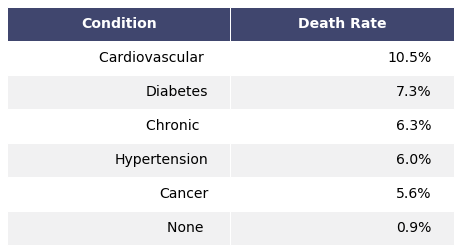

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

a=render_mpl_table(df_cond, header_columns=0, col_width=4.0)
fig=a.get_figure()
fig.savefig("C:/Users/smohammed/Desktop/Tableau/corona virus/daa hack/startbootstrap-one-page-wonder-gh-pages/PrecondFatalities.png")

In [65]:
url2 = "https://www.worldometers.info/coronavirus/coronavirus-symptoms/"
response2 = requests.get(url2)
coverpage2 = response2.content
soup2 = BeautifulSoup(coverpage2, 'html5lib')
heading4=soup2.find_all('table',class_="table table-hover table-bordered table-condensed table-list")
name5=heading4[2]
import re

header5=[]
values5=[]
for trs in name5.find_all('tr'):
        heading1=trs.get_text(strip=True)
        word1 = " ".join(re.findall("[a-zA-Z]+",heading1 ))
        tds = trs.find_all('td')
        row = [elem.text.strip(u'\u200b') for elem in tds]
        header5.append(word1)
        values5.append(row)


        

In [67]:
values5
Symptom=[]
for x in values5:
    Symptom.append(x[0])



In [69]:
Symptom=Symptom[1:]


In [70]:
Symptom=Symptom[:-1]

In [ ]:
Symptom=Symptom[:-1]

In [73]:
Symptom

['Fever',
 'Cough',
 'Shortness of breath',
 'Muscle ache',
 'Confusion',
 'Headache',
 'Sore throat',
 'Rhinorrhoea (runny nose) ',
 'Chest pain',
 'Diarrhea',
 'Nausea and vomiting']

In [ ]:
values6=values5[1:]

In [79]:
Percentage_reported=[]
for x in values6:
    Percentage_reported.append(x[1])

In [82]:
Percentage_reported=Percentage_reported[:-1]

In [84]:
Percentage_reported=Percentage_reported[:-1]

In [85]:
Percentage_reported

['83%', '82%', '31%', '11%', '9%', '8%', '5%', '4%', '2%', '2%', '1%']

In [86]:
import pandas as pd
Percentage = {'Symptom':Symptom,
        'Reported Percentage': Percentage_reported
        }


In [87]:
df_symptom = pd.DataFrame(Percentage, columns = ['Symptom', 'Reported Percentage'])

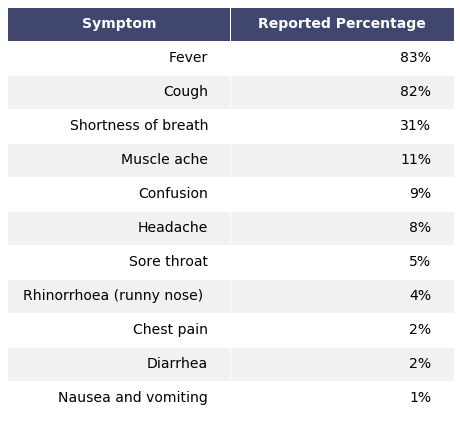

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

a=render_mpl_table(df_symptom, header_columns=0, col_width=4.0)
fig=a.get_figure()
fig.savefig("C:/Users/smohammed/Desktop/Tableau/corona virus/daa hack/startbootstrap-one-page-wonder-gh-pages/Symptom.png")